In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from Funzioni import *
import numpy as np
from ray import tune

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## Plot articles results
Dataset can be selected between <em>MNIST</em> and ,<em>Fashion-MNIST</em> and the activation function between <em>tanh
, elu, relu</em>

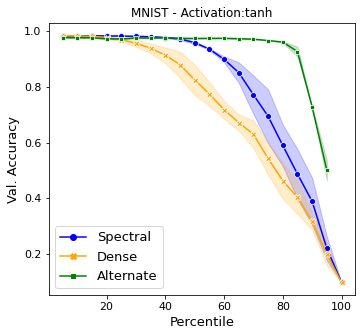

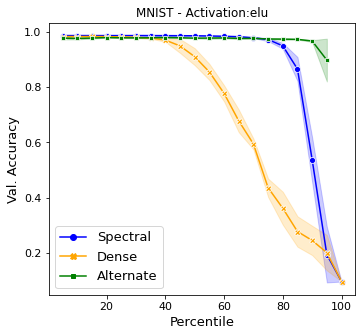

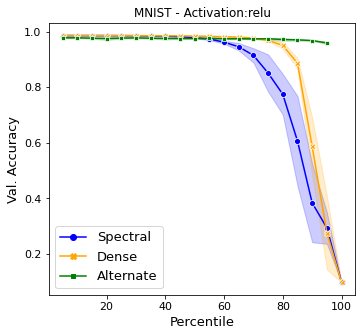

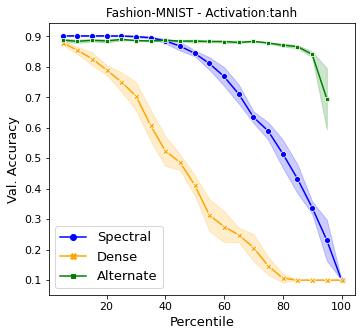

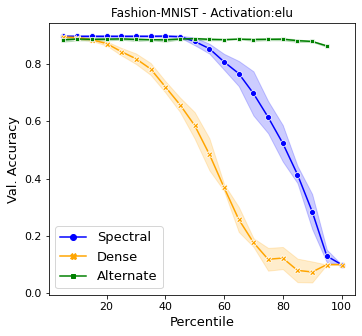

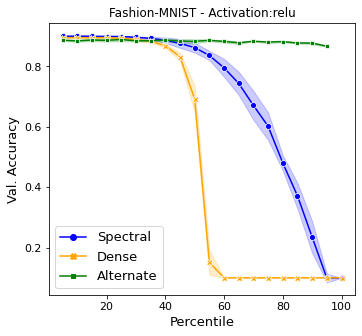

In [2]:
dataset_list = ['MNIST', 'Fashion-MNIST']
activ_list = ['tanh', 'elu', 'relu']

for ds in dataset_list:
    for act in activ_list:
        plot_based_on(dataset=ds, save_fig=True, activation=act, fname='multilayer3_results-df.pk')

## Start another test
Every trial is parallelized using the package `ray-tune`. resources can be modulated as needed.
in the variable `trialResouces`, the number of per trial repetition is `n_boot` and the number of layers is set in
`hidden_layers`.
The results are saved as dataframe in the folder given in `model_config['save_path']`

In [ ]:
hidden_layers = 3
n_boot = 5
trialResources = {'cpu': 1, 'gpu': 0.2}

model_config = {
    'type': 'Spectral',
    'activation': 'tanh',  # Activation function
    'hidden_size': 500,
    'hidden_layers': hidden_layers,

    # Training Parameters
    'dataset': 'Fashion-MNIST',
    'batch_size': 200,
    'epochs': 100,
    'save_path': join(os.getcwd(),'MultiLayer_Results'),
    'result_file_name': 'multilayer' + str(hidden_layers) + '_results-dataframe.pk',
    'learn_rate': 0.001,

    # Trimming parameters
    'percentiles': np.arange(5, 100, 5)
}

activ_list = ['elu']
type_list = ['Alternate']
dataset_list = [ 'Fashion-MNIST']

model_config['type'] = tune.grid_search(type_list)
model_config['activation'] = tune.grid_search(activ_list)
model_config['dataset'] = tune.grid_search(dataset_list)

result = tune.run(train_and_trim_multilayer,
                  num_samples=n_boot,
                  resources_per_trial=trialResources,
                  config=model_config)